In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

In [10]:
mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']

In [11]:
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = []
sharpe_ratio = [] 

In [12]:
for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)  # ①

In [13]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]  # ② 


In [14]:
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # ③
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # ④

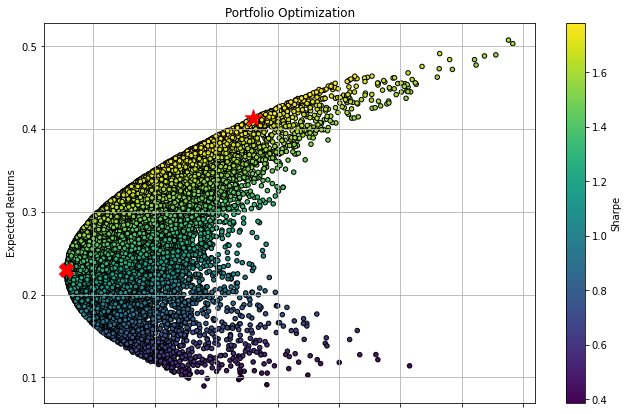

In [15]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
    edgecolors='k', figsize=(11,7), grid=True)  # ⑤
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', 
    marker='*', s=300)  # ⑥
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
    marker='X', s=200)  # ⑦
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

In [16]:
# 샤프지수는 측정된 위험 단위당 수익률을 계산한다는 점에서 
# 수익률의 표준편차와 다른 점이 있다. 

# 샤프 지수가 높을스록 위험에 대한 보상이 더 크다.

In [17]:
# KOSPI 시총 상위 4개 종목이 각가 랜덤한 비율로 구성된 2만개
# 포트폴리오 중에서 단순히 예상 수익률이 가장 높은 포트폴리오
# 를 구해도 되지만. 샤프 지수를 이용하면 2만개 포트폴리오
# 중에서 측정된 위험 단위당 수익이 제일 높은 포트폴리오를 
# 구할 수 있다.

# 이전 소스코드에서 Sharpe 칼럼을 추가하자.
# 샤프 지수가 제일 큰 포트폴리오는 테이터프레임에서 
# max() 함수를 이용해서 sharpe 칼럼값이 가장 큰 행을 반환하면 된다.

# 위험 단위당 수익률이 가장 높은 포트폴리오는 Sharpe값이 가장 큰 행을 
# 가장 안전한 포트폴리오는 Risk 값이 가장 작은 행을 찾으면 된다.

In [18]:
# 12588 행 약 1년 반 동안 23% 변동률을 겪으면서 40%의 수익
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,현대자동차,NAVER
12588,0.412951,0.231865,1.781,0.493832,0.408405,0.097036,0.000727


In [19]:
min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,현대자동차,NAVER
9469,0.229323,0.171219,1.339354,0.331082,0.099743,0.349659,0.219517
